In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles

In [2]:
## Stat file is a combined version of 'Additional File 1.csv', 'Additional File 2.csv', and  'Additional File 3.csv' ##

Stat_file = pd.read_csv('Stat_file.csv', index_col=0)

C:\Users\asadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

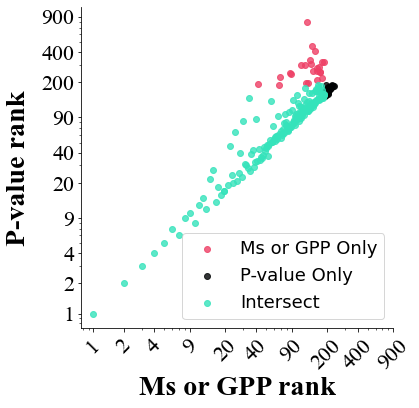

In [4]:
### Figure 2a ##

Stat_file_v2 = Stat_file.copy() # Statistics dataframe contains all ranks

pvalue_df = Stat_file_v2.copy()
pvalue_df = pvalue_df.sort_values('Rank_p-value')
pvalue_df = pvalue_df[:188] # Taking top 189 SNPs based on pvalue rank

marginal_df = Stat_file_v2.copy()
marginal_df = marginal_df.sort_values('Rank_GPP')
marginal_df = marginal_df[:188] # Taking top 189 SNPs based on 'gPP rank'

intersect_hdl = set(pvalue_df.index.tolist()).intersection(marginal_df.index.tolist())
only_ici_500 = set(marginal_df.index.tolist()) - intersect_hdl
only_gwas_500 = set(pvalue_df.index.tolist()) - intersect_hdl

IBI_df_with_marginal_and_pvalue = Stat_file_v2.copy()
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[IBI_df_with_marginal_and_pvalue.index.isin(list(only_ici_500))]

GWAS_df_with_marginal_and_pvalue = Stat_file_v2.copy()
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[GWAS_df_with_marginal_and_pvalue.index.isin(list(only_gwas_500))]

Intersect_df_with_marginal_and_pvalue = Stat_file_v2.copy()
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[Intersect_df_with_marginal_and_pvalue.index.isin(list(intersect_hdl))]

IBI_df_with_marginal_and_pvalue['Class'] = 'Rank_GPP_Only'
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[['Rank_GPP', 'Rank_p-value', 'Class']]
GWAS_df_with_marginal_and_pvalue['Class'] = 'GWAS_Only'
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[['Rank_GPP', 'Rank_p-value', 'Class']]
Intersect_df_with_marginal_and_pvalue['Class'] = 'Intersect'
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[['Rank_GPP', 'Rank_p-value', 'Class']]

scatter_hdl = pd.concat([IBI_df_with_marginal_and_pvalue, GWAS_df_with_marginal_and_pvalue, Intersect_df_with_marginal_and_pvalue], axis=0)
scatter_hdl.columns = ['Rank_GPP', 'GWAS_rank', 'Class']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(5,5))
palette = sns.color_palette(["#ee3f65", "#000203",  "#35e3bb"])
sns.lmplot('Rank_GPP', 'GWAS_rank', scatter_hdl, hue='Class', palette=palette, fit_reg=False, legend=False)
fig = plt.gcf()
plt.yscale("log")
plt.xscale("log")
labels = [1, 2, 4, 9, 20, 40, 90, 200, 400, 900]
plt.yticks(labels, labels, fontname="Times New Roman", size=22,fontweight="regular")
plt.xticks(labels, labels, rotation=45, fontname="Times New Roman", size=22,fontweight="regular")
plt.xlabel('Ms or GPP rank', fontname="Times New Roman", size=28,fontweight="bold")
plt.ylabel('P-value rank', labelpad=10,  fontname="Times New Roman", size=28,fontweight="bold")
plt.rc('legend', fontsize=18)    # legend fontsize
plt.legend(loc='lower right', labels=['Ms or GPP Only', 'P-value Only', 'Intersect'])

C:\Users\asadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

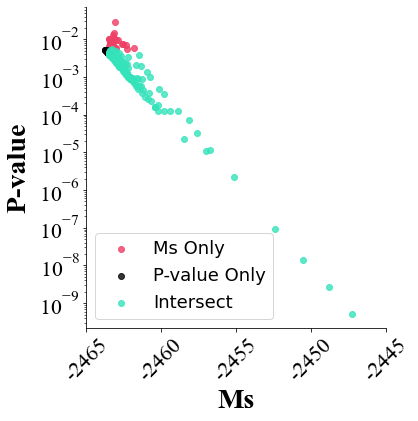

In [5]:
### Figure 2b ##


Stat_file_v2 = Stat_file.copy() # Statistics dataframe contains all ranks

pvalue_df = Stat_file_v2.copy()
pvalue_df = pvalue_df.sort_values('p-value')
pvalue_df = pvalue_df[:188] # Taking top 189 SNPs based on pvalue

marginal_df = Stat_file_v2.copy()
marginal_df = marginal_df.sort_values('Ms', ascending=False)
marginal_df = marginal_df[:188] # Taking top 189 SNPs based on 'glgm'

intersect_hdl = set(pvalue_df.index.tolist()).intersection(marginal_df.index.tolist())
only_ici_500 = set(marginal_df.index.tolist()) - intersect_hdl
only_gwas_500 = set(pvalue_df.index.tolist()) - intersect_hdl

IBI_df_with_marginal_and_pvalue = Stat_file_v2.copy()
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[IBI_df_with_marginal_and_pvalue.index.isin(list(only_ici_500))]

GWAS_df_with_marginal_and_pvalue = Stat_file_v2.copy()
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[GWAS_df_with_marginal_and_pvalue.index.isin(list(only_gwas_500))]

Intersect_df_with_marginal_and_pvalue = Stat_file_v2.copy()
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[Intersect_df_with_marginal_and_pvalue.index.isin(list(intersect_hdl))]

IBI_df_with_marginal_and_pvalue['Class'] = 'glgM_Only'
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[['Ms', 'p-value', 'Class']]

GWAS_df_with_marginal_and_pvalue['Class'] = 'simple_pvalue_Only'
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[['Ms', 'p-value', 'Class']]

Intersect_df_with_marginal_and_pvalue['Class'] = 'Intersect'
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[['Ms', 'p-value', 'Class']]

scatter_hdl = pd.concat([IBI_df_with_marginal_and_pvalue, GWAS_df_with_marginal_and_pvalue, Intersect_df_with_marginal_and_pvalue], axis=0)
scatter_hdl.columns = ['Ms', 'p-value', 'Class']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(5,5))
palette = sns.color_palette(["#ee3f65", "#000203",  "#35e3bb"])
sns.lmplot('Ms', 'p-value', scatter_hdl, hue='Class', palette=palette, fit_reg=False, legend=False)
fig = plt.gcf()
plt.yscale("log")
labels = [-2445, -2450, -2455, -2460, -2465]
plt.yticks(fontname="Times New Roman", size=22,fontweight="regular")
plt.xticks(labels, labels, rotation=45,fontname="Times New Roman", size=22,fontweight="regular")
plt.xlabel('Ms', fontname="Times New Roman", size=28,fontweight="bold")
plt.ylabel('P-value', labelpad=8,  fontname="Times New Roman", size=28,fontweight="bold")
plt.rc('legend', fontsize=18)    # legend fontsize
plt.legend( loc='lower left', labels=['Ms Only', 'P-value Only', 'Intersect'])

C:\Users\asadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

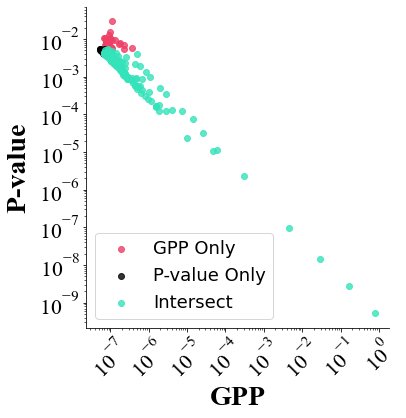

In [6]:
### Figure 2c ##

Stat_file_v2 = Stat_file.copy() # Statistics dataframe contains all ranks

pvalue_df = Stat_file_v2.copy()
pvalue_df = pvalue_df.sort_values('p-value')
pvalue_df = pvalue_df[:188] # Taking top 189 SNPs based on Pvalue 

marginal_df = Stat_file_v2.copy()
marginal_df = marginal_df.sort_values('GPP', ascending=False)
marginal_df = marginal_df[:188] # Taking top 189 SNPs based on 'gpp'

intersect_hdl = set(pvalue_df.index.tolist()).intersection(marginal_df.index.tolist())
only_ici_500 = set(marginal_df.index.tolist()) - intersect_hdl
only_gwas_500 = set(pvalue_df.index.tolist()) - intersect_hdl

IBI_df_with_marginal_and_pvalue = Stat_file_v2.copy()
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[IBI_df_with_marginal_and_pvalue.index.isin(list(only_ici_500))]

GWAS_df_with_marginal_and_pvalue = Stat_file_v2.copy()
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[GWAS_df_with_marginal_and_pvalue.index.isin(list(only_gwas_500))]

Intersect_df_with_marginal_and_pvalue = Stat_file_v2.copy()
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[Intersect_df_with_marginal_and_pvalue.index.isin(list(intersect_hdl))]

IBI_df_with_marginal_and_pvalue['Class'] = 'gPP_Only'
IBI_df_with_marginal_and_pvalue = IBI_df_with_marginal_and_pvalue[['GPP', 'p-value', 'Class']]

GWAS_df_with_marginal_and_pvalue['Class'] = 'simple_pvalue_Only'
GWAS_df_with_marginal_and_pvalue = GWAS_df_with_marginal_and_pvalue[['GPP', 'p-value', 'Class']]

Intersect_df_with_marginal_and_pvalue['Class'] = 'Intersect'
Intersect_df_with_marginal_and_pvalue = Intersect_df_with_marginal_and_pvalue[['GPP', 'p-value', 'Class']]
scatter_hdl = pd.concat([IBI_df_with_marginal_and_pvalue, GWAS_df_with_marginal_and_pvalue, Intersect_df_with_marginal_and_pvalue], axis=0)
scatter_hdl.columns = ['GPP', 'p-value', 'Class']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(5,5))
palette = sns.color_palette(["#ee3f65", "#000203",  "#35e3bb"])
sns.lmplot('GPP', 'p-value', scatter_hdl, hue='Class', palette=palette, fit_reg=False, legend=False)
fig = plt.gcf()
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontname="Times New Roman", size=22,fontweight="regular")
plt.xticks(rotation=45,fontname="Times New Roman", size=22,fontweight="regular")
plt.xlabel('GPP', fontname="Times New Roman", size=28,fontweight="bold")
plt.ylabel('P-value', labelpad=8,  fontname="Times New Roman", size=28,fontweight="bold")
plt.rc('legend', fontsize=18)    # legend fontsize
plt.legend( loc='lower left', labels=['GPP Only', 'P-value Only', 'Intersect'])